# Cover Tree Quote conversion Prediction Model [Without Undersampling]
<img src = "https://mms.businesswire.com/media/20220919005204/en/1574993/23/Group-4204-1024x264.jpg" width="300" height="150">

>[Cover Tree Quote conversion Prediction Model](#scrollTo=ZNamV2k-PO0E)

>[Problem Statement and Vision](#scrollTo=hngpHnH_r0Ha)

>>[What are we trying to solve?](#scrollTo=hngpHnH_r0Ha)

>>[Agenda](#scrollTo=hngpHnH_r0Ha)

>>[Goal](#scrollTo=hngpHnH_r0Ha)

>[Import Libraries](#scrollTo=sjnHqWCkebd4)

>[Function to calculate metrics: prediction, accuracy score, recall and precision score.](#scrollTo=UEvS8_AVszfs)

>[Import Dataset](#scrollTo=KfxDEt7LegJ9)

>[EDA](#scrollTo=69sqWCZaekcZ)

>[Data Preprocessing](#scrollTo=NYAoN5Hw8ce9)

>>[Handling Null values and datatypes](#scrollTo=5iFQMGWMc_o7)

>>[One Hot Encoding](#scrollTo=_DG-hyYUKBMy)

>>[Feature Selection](#scrollTo=sRnknaYVdjHW)

>>[Train test split](#scrollTo=WzfvAembJMlK)

>>[Checking for class imbalance](#scrollTo=g1EukdUAI9BS)

>>[SMOTE for minority class:](#scrollTo=F3WPbtANBzjt)

>[Building the model](#scrollTo=etLyYmUEeMBY)

>>[Decision Tree Classification](#scrollTo=rWLhX1P8fnjR)

>>[optimizing the model](#scrollTo=QJ4-NyIjfduu)

>[Random forest classification](#scrollTo=-1mibfdKgmuw)

>[Logistic Regression](#scrollTo=qhW1kGvBhk3u)

>>[Optimizing the model](#scrollTo=In9PpwEEiyeK)



# Problem Statement and Vision

## What are we trying to solve?
> Covertree, a manufactured home insurance company wants to know if the quotes will be purchased by a customer so that they can take necessary steps to avoid inefficient allocation of resources and missed revenue chances.

## Agenda
> Develop a classification model that will be used by marketing and sales team to determine whether a quote will be converted into a policy.

## Goal
> 1. Efficiently predict if the quote will be converted.

> 2. Reduce the number of false positives, which happens when a quote isn't converted but the model predicts that the quote will be converted into policy.
>> - False positives dilute the effectiveness of these efforts by diverting resources away from promising leads. By minimizing false positives, the business can focus its efforts on prospects with a higher probability of conversion, thus maximizing ROI.
>> -  By reducing false positives, the business can ensure that customers receive personalized communication tailored to their needs, improving overall satisfaction and loyalty.
>> - By minimizing false positives, the business can uphold its reputation for accuracy and reliability, strengthening its relationships with customers and stakeholders.

> 3. Increase the precision metric, which happens when a quote is converted into a policy and the model predicts the conversion correctly.
Here's why precision is particularly important in this scenario:

>> - **Business Impact**: Maximizing precision ensures that resources (such as sales and marketing efforts) are directed towards quotes with the highest likelihood of conversion, thereby maximizing the ROI and optimizing resource allocation.

>> - **Cost Considerations**: False positive predictions (quotes predicted to be converted but actually not converted) can have financial implications for the business, such as wasted sales efforts, marketing expenses, or other operational costs associated with servicing non-converting quotes. Maximizing precision helps minimize false positives and associated costs.

>> - **Customer Experience**: Making accurate predictions about quote conversion can enhance the customer experience by ensuring that customers receive relevant and targeted communication and offers. High precision means that customers are less likely to receive irrelevant offers or follow-up communication for quotes that are not likely to convert.

> 4. Check for the cost of false negatives (missed opportunities for conversion) significance. Recall will be an important metric to consider alongside precision.

> 5. Since we need to reduce False positives, we will **monitor Precision and Accuracy** while keeping False Negatives at lower level.

#Import Libraries

In [138]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Function to calculate metrics: prediction, accuracy score, recall and precision score.

In [137]:
def metrics_calc(model, X_test, y_test):
  #predicting the model
  y_pred = model.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")

  # Precision calculation :'y_test' are the true labels and 'y_pred' are the predicted labels
  precision = precision_score(y_test, y_pred)
  print("Precision:",round(precision*100,2) ,"%")

  #Recall calculation
  recall = recall_score(y_test, y_pred)
  print("Recall:", round(recall * 100, 2), "%")

  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Import Dataset

In [69]:
dataset = pd.read_csv('machine_learning.csv')
#dataset.head()

#EDA

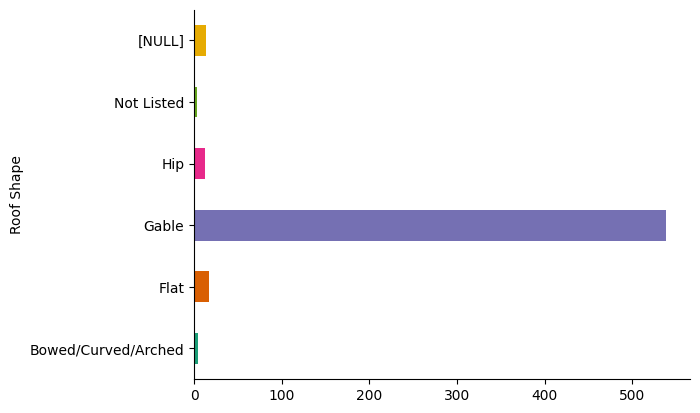

In [70]:
# @title Roof Shape

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Roof Shape').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

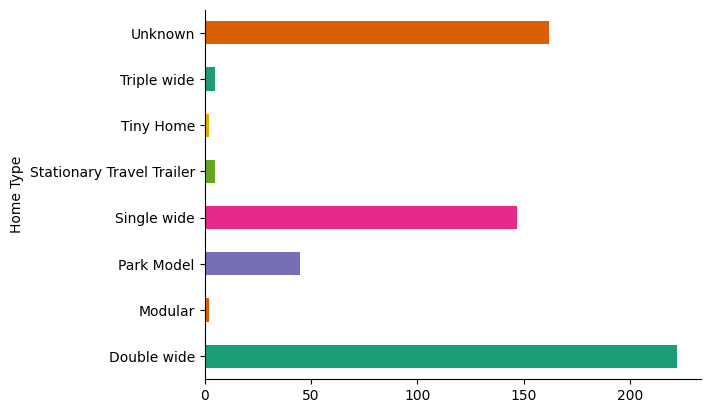

In [71]:
# @title Home Type

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Home Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

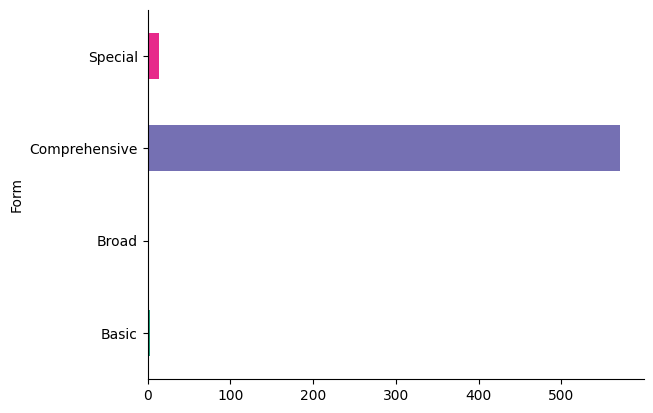

In [72]:
# @title Form

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Form').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

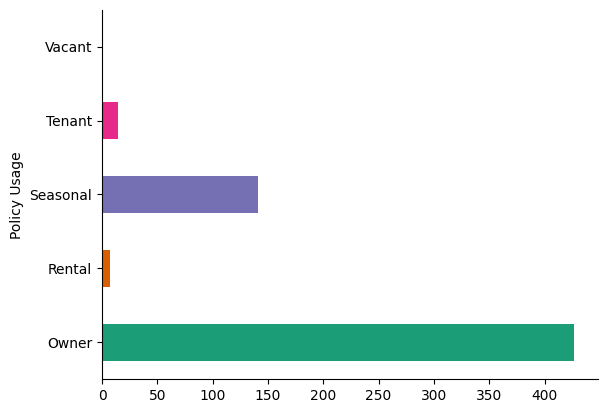

In [73]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Policy Usage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Preprocessing

## Handling Null values and datatypes

In [74]:
#replace string '[NULL]' to null value in dataframe
dataset.replace('[NULL]', np.nan, inplace=True)

# Print the DataFrame after replacement
print(dataset)

     QUOTE_LOCATOR State             City                  Address  \
0        100689574    AZ  Apache Junction  10220 East Apache Trail   
1        106067788    IN         Monterey            8938 S Ash St   
2        106170568    AZ             Mesa          5001 E Maint St   
3        106135316    AZ           Parker           309 N Misty Ln   
4        106146174    MI   Mount Pleasant       5232 E Broadway Rd   
..             ...   ...              ...                      ...   
585      111675928    AZ        El Mirage     11201 N El Mirage Rd   
586      111680300    AZ             Yuma      13650 N Frontage Rd   
587      111690330    OK            Grove           63551 E 293 Rd   
588      111702582    AZ             Mesa       120 N Val Vista Dr   
589      111720024    AZ             Mesa             311 S Arvada   

    Policy Usage           Form    Home Type Roof Shape Roof Condition  \
0          Owner  Comprehensive  Single wide       Flat           Fair   
1          

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   QUOTE_LOCATOR         590 non-null    int64 
 1   State                 590 non-null    object
 2   City                  590 non-null    object
 3   Address               589 non-null    object
 4   Policy Usage          590 non-null    object
 5   Form                  590 non-null    object
 6   Home Type             590 non-null    object
 7   Roof Shape            576 non-null    object
 8   Roof Condition        576 non-null    object
 9   Model Year            576 non-null    object
 10  Total Square Footage  576 non-null    object
 11  ACV                   576 non-null    object
 12  RCV                   576 non-null    object
 13  Issued Flag           590 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 64.7+ KB


In [76]:
# Assuming 'df' is your DataFrame

# List of columns you want to convert to int64
columns_to_convert = ['Total Square Footage', 'ACV', 'RCV']

# Loop through each column and convert its values to int64
for col in columns_to_convert:
  # Convert NaN values to a placeholder value (e.g., 0)
    dataset[col].fillna(0, inplace=True)
    #convert object to int datatype
    dataset[col] = dataset[col].astype('int64')

# Print the DataFrame after conversion
print(dataset)

     QUOTE_LOCATOR State             City                  Address  \
0        100689574    AZ  Apache Junction  10220 East Apache Trail   
1        106067788    IN         Monterey            8938 S Ash St   
2        106170568    AZ             Mesa          5001 E Maint St   
3        106135316    AZ           Parker           309 N Misty Ln   
4        106146174    MI   Mount Pleasant       5232 E Broadway Rd   
..             ...   ...              ...                      ...   
585      111675928    AZ        El Mirage     11201 N El Mirage Rd   
586      111680300    AZ             Yuma      13650 N Frontage Rd   
587      111690330    OK            Grove           63551 E 293 Rd   
588      111702582    AZ             Mesa       120 N Val Vista Dr   
589      111720024    AZ             Mesa             311 S Arvada   

    Policy Usage           Form    Home Type Roof Shape Roof Condition  \
0          Owner  Comprehensive  Single wide       Flat           Fair   
1          

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   QUOTE_LOCATOR         590 non-null    int64 
 1   State                 590 non-null    object
 2   City                  590 non-null    object
 3   Address               589 non-null    object
 4   Policy Usage          590 non-null    object
 5   Form                  590 non-null    object
 6   Home Type             590 non-null    object
 7   Roof Shape            576 non-null    object
 8   Roof Condition        576 non-null    object
 9   Model Year            576 non-null    object
 10  Total Square Footage  590 non-null    int64 
 11  ACV                   590 non-null    int64 
 12  RCV                   590 non-null    int64 
 13  Issued Flag           590 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 64.7+ KB


In [78]:
# List of columns to replace null values in
columns_to_replace = ['Roof Shape', 'Roof Condition']

# Replace null values with 'Not Listed' in specified columns
for col in columns_to_replace:
    dataset[col].fillna('Not Listed', inplace=True)

dataset['Model Year'].fillna('2299', inplace=True)

# Print the DataFrame after replacement
print(dataset)

     QUOTE_LOCATOR State             City                  Address  \
0        100689574    AZ  Apache Junction  10220 East Apache Trail   
1        106067788    IN         Monterey            8938 S Ash St   
2        106170568    AZ             Mesa          5001 E Maint St   
3        106135316    AZ           Parker           309 N Misty Ln   
4        106146174    MI   Mount Pleasant       5232 E Broadway Rd   
..             ...   ...              ...                      ...   
585      111675928    AZ        El Mirage     11201 N El Mirage Rd   
586      111680300    AZ             Yuma      13650 N Frontage Rd   
587      111690330    OK            Grove           63551 E 293 Rd   
588      111702582    AZ             Mesa       120 N Val Vista Dr   
589      111720024    AZ             Mesa             311 S Arvada   

    Policy Usage           Form    Home Type Roof Shape Roof Condition  \
0          Owner  Comprehensive  Single wide       Flat           Fair   
1          

In [79]:
dataset.isnull().sum()

QUOTE_LOCATOR           0
State                   0
City                    0
Address                 1
Policy Usage            0
Form                    0
Home Type               0
Roof Shape              0
Roof Condition          0
Model Year              0
Total Square Footage    0
ACV                     0
RCV                     0
Issued Flag             0
dtype: int64

In [80]:
dataset.describe()

,QUOTE_LOCATOR,Total Square Footage,ACV,RCV,Issued Flag
count,5.900000e+02,590.000000,590.000000,590.000000,590.000000
mean,1.091883e+08,1159.050847,30745.538983,111005.637288,0.166102
std,1.604042e+06,586.476739,23209.889862,56065.166760,0.372488
min,1.006896e+08,0.000000,0.000000,0.000000,0.000000
25%,1.077649e+08,720.000000,14599.000000,72324.500000,0.000000
50%,1.091215e+08,1152.000000,22960.500000,105123.000000,0.000000
75%,1.108928e+08,1500.000000,42026.750000,147070.250000,0.000000
max,1.117200e+08,3192.000000,144686.000000,358293.000000,1.000000


##One Hot Encoding
One-hot encoding is typically performed on categorical variables in a dataset to convert them into a numerical format that can be used as input features in a machine learning model.

Many machine learning algorithms, especially those implemented in libraries like scikit-learn or TensorFlow, require numerical input data.

Categorical variables, such as 'State', 'City', 'Policy Usage', etc., are non-numeric, so they need to be converted into numeric format for the model to understand and process them.

## Feature Selection

In [81]:
#from sklearn.preprocessing import OneHotEncoder

# List of categorical columns for one-hot encoding
categorical_columns = ['State', 'City', 'Policy Usage', 'Form', 'Home Type', 'Roof Shape', 'Roof Condition']
categorical_columns

['State',
 'City',
 'Policy Usage',
 'Form',
 'Home Type',
 'Roof Shape',
 'Roof Condition']

In [82]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(dataset[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [83]:
# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame, dropping the original categorical columns
data_encoded = pd.concat([dataset.drop(columns=categorical_columns), encoded_df], axis=1)

# Print the encoded DataFrame
print("Encoded DataFrame:")
print(data_encoded)

Encoded DataFrame:
     QUOTE_LOCATOR                  Address Model Year  Total Square Footage  \
0        100689574  10220 East Apache Trail       1968                   780   
1        106067788            8938 S Ash St       2007                  1620   
2        106170568          5001 E Maint St       1986                   320   
3        106135316           309 N Misty Ln       1985                  1296   
4        106146174       5232 E Broadway Rd       1995                  1500   
..             ...                      ...        ...                   ...   
585      111675928     11201 N El Mirage Rd       2012                  1200   
586      111680300      13650 N Frontage Rd       2007                   399   
587      111690330           63551 E 293 Rd       1994                  1568   
588      111702582       120 N Val Vista Dr       2001                  1456   
589      111720024             311 S Arvada       1983                  1440   

       ACV     RCV  

In [84]:
data_encoded

,QUOTE_LOCATOR,Address,Model Year,Total Square Footage,ACV,RCV,Issued Flag,State_AR,State_AZ,State_GA,...,Roof Shape_Flat,Roof Shape_Gable,Roof Shape_Hip,Roof Shape_Not Listed,Roof Condition_Fair,Roof Condition_Good,Roof Condition_Not Listed,Roof Condition_Poor,Roof Condition_Severe,Roof Condition_Unknown
0,100689574,10220 East Apache Trail,1968,780,17156,96138,1,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,106067788,8938 S Ash St,2007,1620,54370,135041,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,106170568,5001 E Maint St,1986,320,6418,45818,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,106135316,309 N Misty Ln,1985,1296,21925,113826,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,106146174,5232 E Broadway Rd,1995,1500,28834,154983,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,111675928,11201 N El Mirage Rd,2012,1200,71859,148953,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
586,111680300,13650 N Frontage Rd,2007,399,19663,68645,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
587,111690330,63551 E 293 Rd,1994,1568,22581,129416,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
588,111702582,120 N Val Vista Dr,2001,1456,36212,124962,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Train test split

In [85]:
list(data_encoded.columns)

['QUOTE_LOCATOR',
 'Address',
 'Model Year',
 'Total Square Footage',
 'ACV',
 'RCV',
 'Issued Flag',
 'State_AR',
 'State_AZ',
 'State_GA',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_MI',
 'State_NM',
 'State_OH',
 'State_OK',
 'State_SC',
 'State_TN',
 'State_TX',
 'City_Albuquerque',
 'City_Alger',
 'City_Amado',
 'City_Amarillo',
 'City_Andrews',
 'City_Apache Jct',
 'City_Apache Junction',
 'City_Atlanta',
 'City_Auburn',
 'City_Bayside',
 'City_Baytown',
 'City_Belleville',
 'City_Benson',
 'City_Big Rapids',
 'City_Bishopville',
 'City_Blanchard',
 'City_Blythewood',
 'City_Buckeye',
 'City_Bullhead City',
 'City_Burleson',
 'City_Byron',
 'City_Caldwell',
 'City_Camp Verde',
 'City_Canton',
 'City_Canyon Lake',
 'City_Capitan',
 'City_Casa Grande',
 'City_Castalian Springs',
 'City_Center',
 'City_Chandler',
 'City_Chelsea',
 'City_Chesaning',
 'City_Chino Valley',
 'City_Clyde',
 'City_Columbia',
 'City_Columbus',
 'City_Coppell',
 'City_Cornville',
 'City_Cottonwood',
 'C

In [86]:
X = data_encoded.drop(columns=['Address','QUOTE_LOCATOR','Issued Flag'],axis=1)
X

,Model Year,Total Square Footage,ACV,RCV,State_AR,State_AZ,State_GA,State_IL,State_IN,State_KS,...,Roof Shape_Flat,Roof Shape_Gable,Roof Shape_Hip,Roof Shape_Not Listed,Roof Condition_Fair,Roof Condition_Good,Roof Condition_Not Listed,Roof Condition_Poor,Roof Condition_Severe,Roof Condition_Unknown
0,1968,780,17156,96138,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2007,1620,54370,135041,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1986,320,6418,45818,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1985,1296,21925,113826,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1995,1500,28834,154983,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2012,1200,71859,148953,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
586,2007,399,19663,68645,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
587,1994,1568,22581,129416,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
588,2001,1456,36212,124962,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [87]:
y = data_encoded['Issued Flag']
y

0      1
1      0
2      1
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Name: Issued Flag, Length: 590, dtype: int64

In [88]:
y

0      1
1      0
2      1
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Name: Issued Flag, Length: 590, dtype: int64

In [89]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [90]:
X_train

,Model Year,Total Square Footage,ACV,RCV,State_AR,State_AZ,State_GA,State_IL,State_IN,State_KS,...,Roof Shape_Flat,Roof Shape_Gable,Roof Shape_Hip,Roof Shape_Not Listed,Roof Condition_Fair,Roof Condition_Good,Roof Condition_Not Listed,Roof Condition_Poor,Roof Condition_Severe,Roof Condition_Unknown
335,2022,480,30797,42600,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43,2006,1100,51063,136728,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
320,1997,1456,27399,126161,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47,1996,1280,23168,129219,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203,2021,396,33014,68619,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2016,1152,47567,92655,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53,2004,1752,62160,183706,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
350,2004,1980,56437,167304,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79,1981,980,15058,82743,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [91]:
y_train

335    0
43     0
320    0
47     0
203    0
      ..
578    1
53     0
350    0
79     0
520    0
Name: Issued Flag, Length: 413, dtype: int64

In [92]:
# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (413, 243)
X_test shape: (177, 243)
y_train shape: (413,)
y_test shape: (177,)


##Checking for class imbalance

In [93]:
zeros_count_y_test = np.sum(y_test == 0)
ones_count_y_test = np.sum(y_test == 1)

print("Counts of 0s and 1s in y_test:")
print("0s:", zeros_count_y_test)
print("1s:", ones_count_y_test)

Counts of 0s and 1s in y_test:
0s: 150
1s: 27


In [94]:
zeros_count_y_train = np.sum(y_train == 0)
ones_count_y_train = np.sum(y_train == 1)

print("Counts of 0s and 1s in y_train:")
print("0s:", zeros_count_y_train)
print("1s:", ones_count_y_train)

Counts of 0s and 1s in y_train:
0s: 342
1s: 71


In [95]:
imbalance_ratio_y_train= ones_count_y_train/(ones_count_y_train+zeros_count_y_train)*100
imbalance_ratio_y_train

17.191283292978206

In [96]:
imbalance_ratio_y_test= ones_count_y_test/(ones_count_y_test+zeros_count_y_test)*100
imbalance_ratio_y_test

15.254237288135593

Approx 85% of the values in both y train and test datasets for 'Issued Flags' are 0's

##SMOTE for minority class:
used to generate synthetic samples for minority class.


In [97]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with a specific strategy to the training data
smote = SMOTE( random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [98]:
zeros_count_y_train_resampled = np.sum(y_train_resampled == 0)
ones_count_y_train_resampled = np.sum(y_train_resampled == 1)

print("Counts of 0s and 1s in y_train:")
print("0s:", zeros_count_y_train_resampled)
print("1s:", ones_count_y_train_resampled)

Counts of 0s and 1s in y_train:
0s: 342
1s: 342


# Building the model

## Decision Tree Classification

In [99]:
#from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf_dt.fit(X_train_resampled,y_train_resampled)
clf_dt

DecisionTreeClassifier()

Accuracy: 80.23 %
Precision: 16.67 %
Recall: 7.41 %


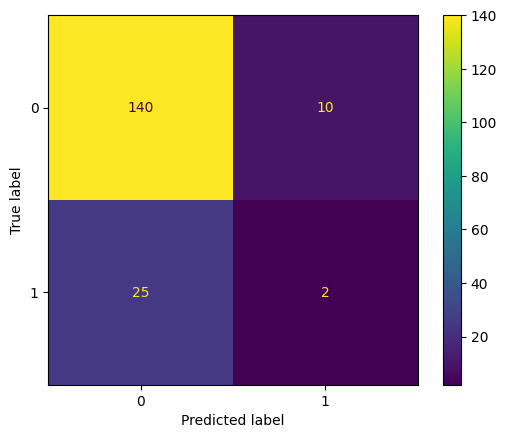

In [139]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(clf_dt, X_test, y_test)

Precision based on the confusion matrix is very low due to imbalanced data but we can look for other attributes in different tables and get more data and attributes to rectify the same.

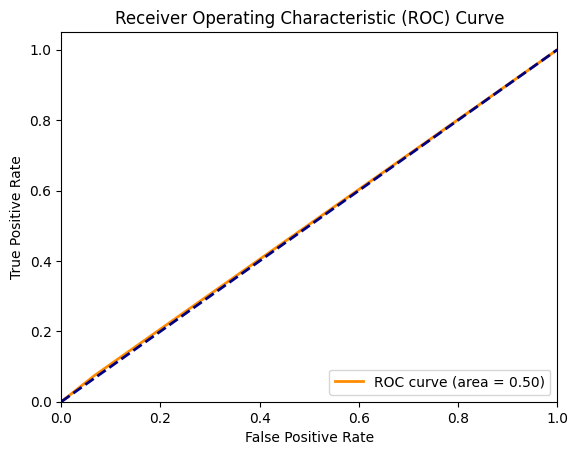

In [103]:
from sklearn.metrics import roc_curve, auc

# Assuming 'y_test' are the true labels and 'y_pred_prob' are the predicted probabilities
# Replace 'y_test' and 'y_pred_prob' with your actual true labels and predicted probabilities

# Predictions for different classifiers
y_pred_dt = clf_dt.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [105]:
#without SMOTE
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier()

Accuracy: 80.23 %
Precision: 10.0 %
Recall: 3.7 %


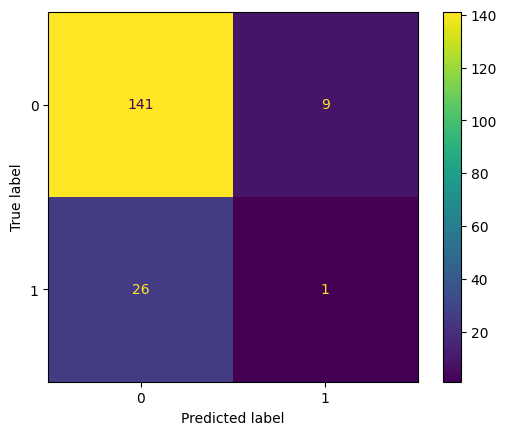

In [140]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(clf, X_test, y_test)

## Optimizing the model
criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source

In [108]:
# Create Decision Tree classifer object
clf_dt_cv = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_dt_cv = clf_dt_cv.fit(X_train,y_train)
clf_dt_cv

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Accuracy: 84.75 %
Precision: 0.0 %
Recall: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


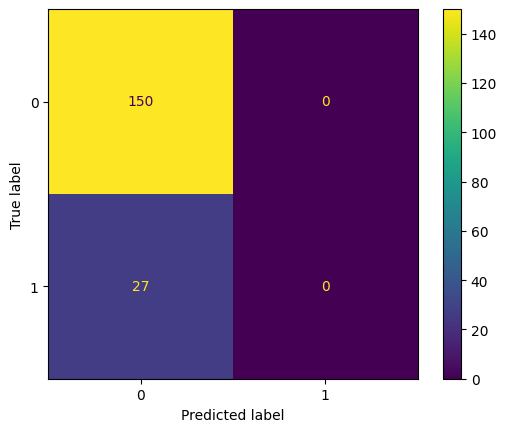

In [141]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(clf_dt_cv, X_test, y_test)

# Random forest classification

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

#training the model
rf_clf = rf_clf.fit(X_train, y_train)
rf_clf

RandomForestClassifier()

Accuracy: 83.05 %
Precision: 20.0 %
Recall: 3.7 %


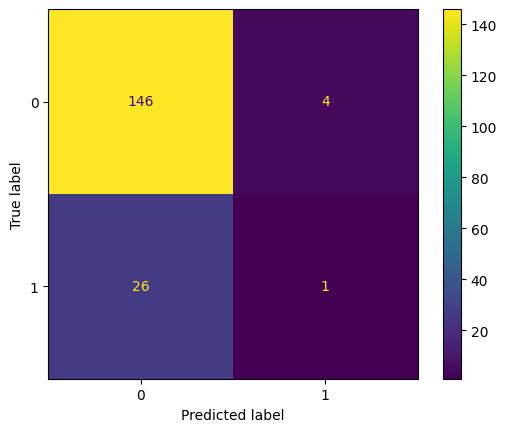

In [142]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(rf_clf, X_test, y_test)

Optimization of RF model using hyperparameter tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a0709236560>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a07092366e0>})

In [116]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 182}


Accuracy: 84.75 %
Precision: 0.0 %
Recall: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


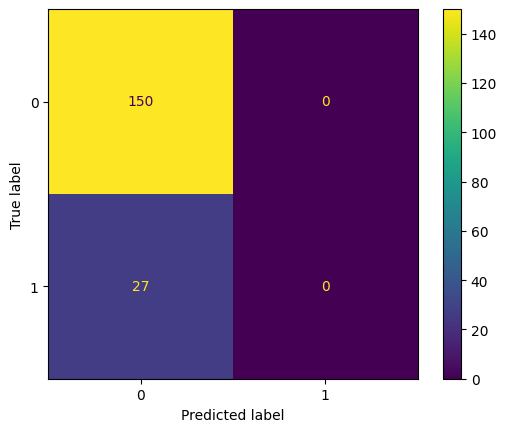

In [143]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(best_rf, X_test, y_test)

# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression
lr = LogisticRegression(random_state=0)
lr = lr.fit(X_train, y_train)
lr

LogisticRegression(random_state=0)

Accuracy: 84.75 %
Precision: 0.0 %
Recall: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


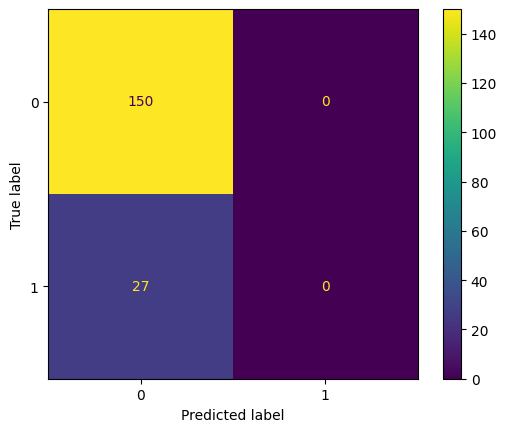

In [144]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(lr, X_test, y_test)

##Optimizing the model

We define a grid of hyperparameters param_grid containing different values for the regularization parameter C and regularization penalty penalty.

We create a Logistic Regression classifier clf with random_state=0.

GridSearchCV to perform grid search with 5-fold cross-validation (cv=5) and accuracy as the scoring metric (scoring='accuracy').

After fitting the grid search object to the training data, we print the best hyperparameters and the corresponding test accuracy achieved by the best model.

max_iter: maximum no of iterations to run

In [125]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'max_iter': [100, 200, 300] ## Maximum number of iterations
}

In [126]:
# Create the Logistic Regression classifier
lr_ht = LogisticRegression(random_state=42)

lr_ht

LogisticRegression(random_state=42)

In [148]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(lr_ht, param_grid, cv=3, scoring='accuracy')
grid_search = grid_search.fit(X_train, y_train)

grid_search

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [149]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}


In [150]:
# Get the best model
best_model_lr = grid_search.best_estimator_
best_model_lr

LogisticRegression(C=0.001, random_state=42)

Accuracy: 84.75 %
Precision: 0.0 %
Recall: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


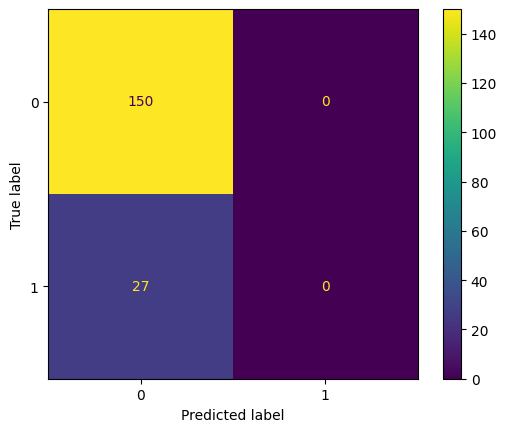

In [153]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(best_model_lr, X_test, y_test)